In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 18.1 MB/s eta 0:00:00


In [3]:
import os
import cv2
import numpy as np


In [4]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 607
Dental Caries: 788
Bone Loss: 894


Augmentation

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Bone Lost"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Dental Caries"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)

# #
#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/input/DISEASE/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [6]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 607
Dental Caries: 788
Bone Loss: 894


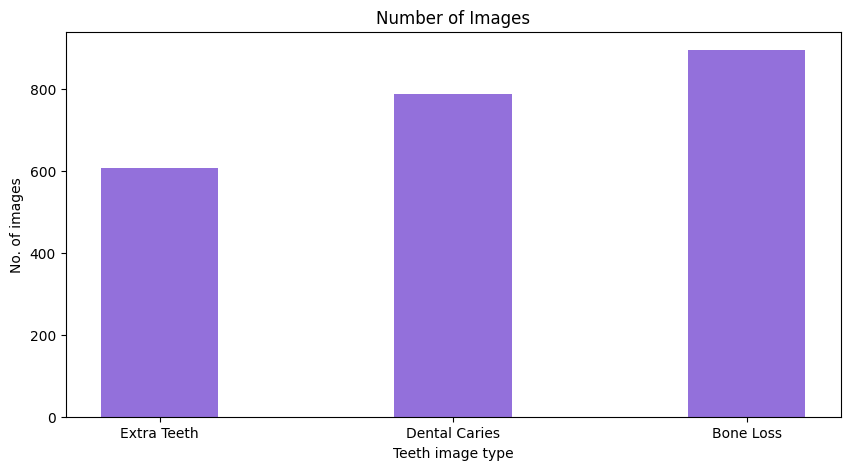

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = data_num
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='mediumpurple',
        width = 0.4)

plt.xlabel("Teeth image type")
plt.ylabel("No. of images")
plt.title("Number of Images")
plt.show()

Pre-Processing

In [8]:


import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np



#RESIZE
def resize_image(image,w,h):
    image=cv2.resize(image,(w,h))
    cv2.imwrite(Folder_name+"/Resize-"+str(w)+"*"+str(h)+Extension, image)

#crop
def crop_image(image,y1,y2,x1,x2):
    image=image[y1:y2,x1:x2]
    cv2.imwrite(Folder_name+"/Crop-"+str(x1)+str(x2)+"*"+str(y1)+str(y2)+Extension, image)

def padding_image(image,topBorder,bottomBorder,leftBorder,rightBorder,color_of_border=[0,0,0]):
    image = cv2.copyMakeBorder(image,topBorder,bottomBorder,leftBorder,
        rightBorder,cv2.BORDER_CONSTANT,value=color_of_border)
    cv2.imwrite(Folder_name + "/padd-" + str(topBorder) + str(bottomBorder) + "*" + str(leftBorder) + str(rightBorder) + Extension, image)

def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)

def superpixel_image(image,segments):
    seg=segments

    def segment_colorfulness(image, mask):
        # split the image into its respective RGB components, then mask
        # each of the individual RGB channels so we can compute
        # statistics only for the masked region
        (B, G, R) = cv2.split(image.astype("float"))
        R = np.ma.masked_array(R, mask=mask)
        G = np.ma.masked_array(B, mask=mask)
        B = np.ma.masked_array(B, mask=mask)

        # compute rg = R - G
        rg = np.absolute(R - G)

        # compute yb = 0.5 * (R + G) - B
        yb = np.absolute(0.5 * (R + G) - B)

        # compute the mean and standard deviation of both `rg` and `yb`,
        # then combine them
        stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
        meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))

        # derive the "colorfulness" metric and return it
        return stdRoot + (0.3 * meanRoot)

    orig = cv2.imread(image)
    vis = np.zeros(orig.shape[:2], dtype="float")

    # load the image and apply SLIC superpixel segmentation to it via
    # scikit-image
    image = io.imread(image)
    segments = slic(img_as_float(image), n_segments=segments,
                    slic_zero=True)
    for v in np.unique(segments):
        # construct a mask for the segment so we can compute image
        # statistics for *only* the masked region
        mask = np.ones(image.shape[:2])
        mask[segments == v] = 0

        # compute the superpixel colorfulness, then update the
        # visualization array
        C = segment_colorfulness(orig, mask)
        vis[segments == v] = C
    # scale the visualization image from an unrestricted floating point
    # to unsigned 8-bit integer array so we can use it with OpenCV and
    # display it to our screen
    vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")

    # overlay the superpixel colorfulness visualization on the original
    # image
    alpha = 0.6
    overlay = np.dstack([vis] * 3)
    output = orig.copy()
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    # cv2.imshow("Visualization", vis)
    cv2.imwrite(Folder_name + "/superpixels-" + str(seg) + Extension, output)

def invert_image(image,channel):
    # image=cv2.bitwise_not(image)
    image=(channel-image)
    cv2.imwrite(Folder_name + "/invert-"+str(channel)+Extension, image)

def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark-" + str(gamma) + Extension, image)

def add_light_color(image, color, gamma=1.0):
    invGamma = 1.0 / gamma
    image = (color - image)
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    if gamma>=1:
        cv2.imwrite(Folder_name + "/light_color-"+str(gamma)+Extension, image)
    else:
        cv2.imwrite(Folder_name + "/dark_color" + str(gamma) + Extension, image)

def saturation_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/saturation-" + str(saturation) + Extension, image)

def hue_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name +"/hue-" + str(saturation) + Extension, image)




In [11]:
#Import different kinds of library
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
# from keras.applications.MobileNetV2 import MobileNetV2, preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [12]:
#Load the dataset
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/New Dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2289 files belonging to 3 classes.


In [13]:
#Class name in my dataset
class_name=dataset.class_names
class_name


['Bone Loss', 'Dental Caries', 'Extra Teeth']

In [14]:
#image shape
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 299, 299, 3)
[2 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 1 1 0 2 0 2]


In [15]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 78.        78.        80.      ]
  [ 79.020065  79.020065  80.91806 ]
  [ 83.03345   83.03345   84.5301  ]
  ...
  [ 56.013367  54.013367  55.013367]
  [ 54.40802   52.40802   53.40802 ]
  [ 54.        52.        53.      ]]

 [[ 86.36957   85.72575   88.36957 ]
  [ 87.52098   86.94284   89.55032 ]
  [ 92.05113   91.73138   94.19591 ]
  ...
  [ 53.74496   51.74496   52.74496 ]
  [ 53.948315  51.948315  52.948315]
  [ 54.        52.        53.      ]]

 [[ 95.4699    94.4699    98.28261 ]
  [ 96.569626  95.63019   99.442894]
  [100.89642  100.19524  104.00794 ]
  ...
  [ 52.28544   50.28544   51.28544 ]
  [ 53.652534  51.652534  52.652534]
  [ 54.        52.        53.      ]]

 ...

 [[140.78098  138.78098  152.37463 ]
  [140.65987  138.65987  152.19296 ]
  [140.18335  138.18335  151.47818 ]
  ...
  [171.26414  169.26414  182.26414 ]
  [175.1896   173.1896   186.1896  ]
  [176.18732  174.18732  187.18732 ]]

 [[144.84961  142.84961  156.49341 ]
  [144.46393  142.46393  156.04205 ]


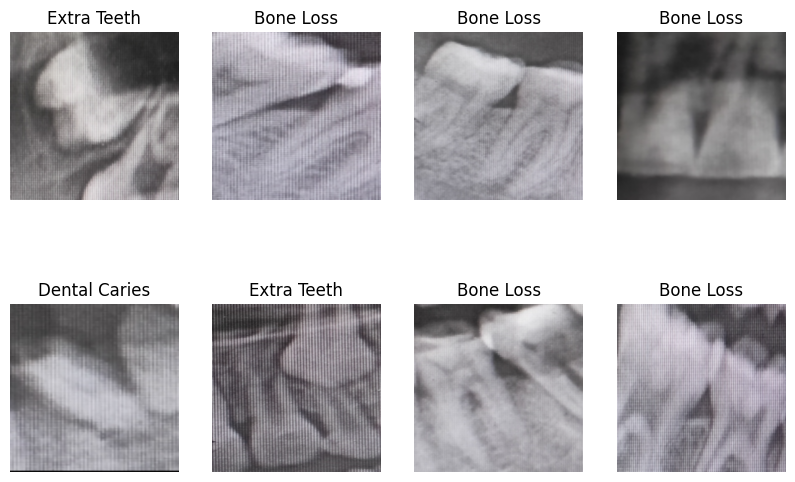

In [16]:
#some data visualization for understanding
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(2):
  for i in range(8):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

##inception v3

In [21]:
#InceptionV3 model
conv_base = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


87910968/87910968 [==============================] - 1s 0us/step


In [22]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 295s 339ms/step - loss: 17.7341 - accuracy: 0.4731 - val_loss: 4.5160 - val_accuracy: 0.4062
Epoch 2/20
50/50 [==============================] - 8s 151ms/step - loss: 2.1681 - accuracy: 0.6363 - val_loss: 2.4078 - val_accuracy: 0.6205
Epoch 3/20
50/50 [==============================] - 8s 170ms/step - loss: 1.3087 - accuracy: 0.6750 - val_loss: 2.3284 - val_accuracy: 0.6205
Epoch 4/20
50/50 [==============================] - 8s 152ms/step - loss: 1.3668 - accuracy: 0.6925 - val_loss: 0.9330 - val_accuracy: 0.7634
Epoch 5/20
50/50 [==============================] - 8s 153ms/step - loss: 1.6179 - accuracy: 0.6675 - val_loss: 3.5070 - val_accuracy: 0.4464
Epoch 6/20
50/50 [==============================] - 8s 153ms/step - loss: 1.7708 - accuracy: 0.6769 - val_loss: 2.5580 - val_accuracy: 0.6875
Epoch 7/20
50/50 [==============================] - 8s 153ms/step - loss: 1.3601 - accuracy: 0.7200 - val_loss: 1.2853 - val_accuracy: 0.7254
Epo

In [23]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 116ms/step - loss: 0.4685 - accuracy: 0.8359


first image to predict
actual label: Extra Teeth
1/1 [==============================] - 2s 2s/step
predicted label: Bone Loss


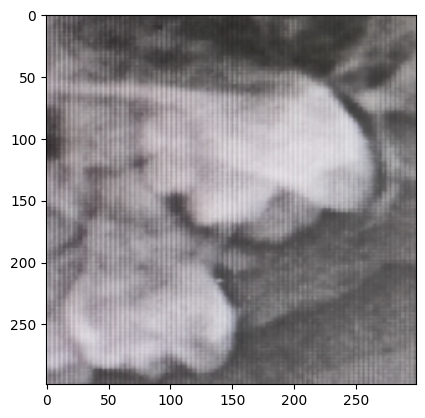

In [24]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


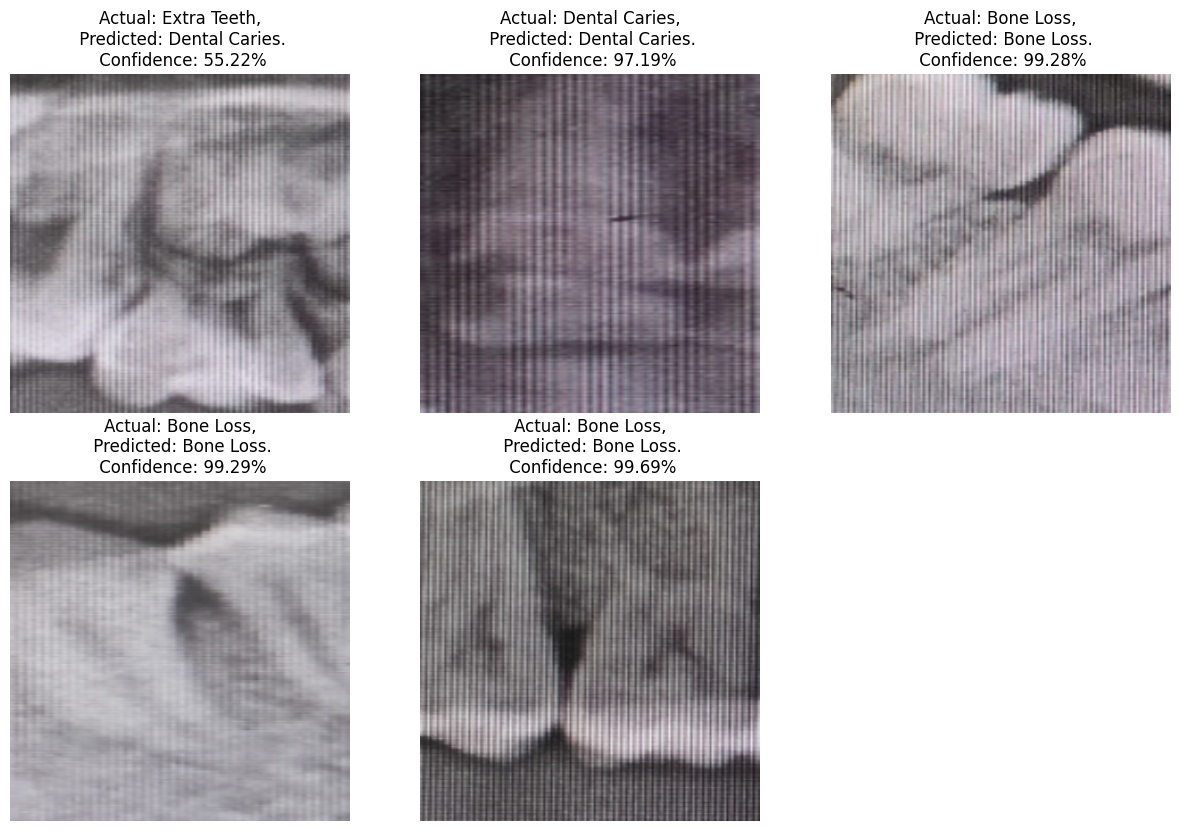

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

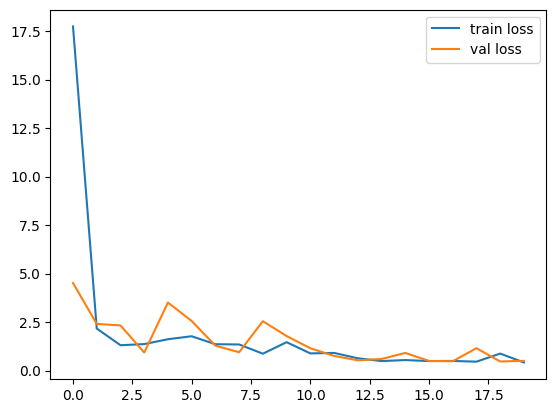

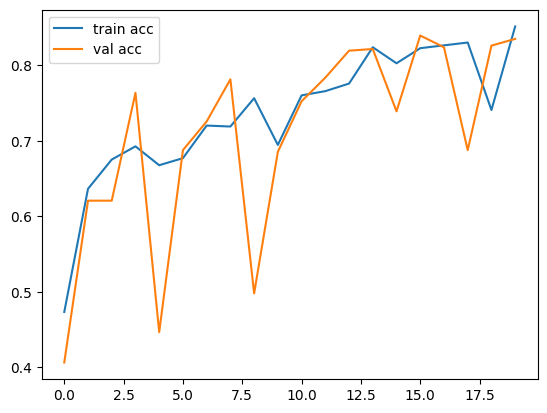

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 29ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 28ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 26ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 24ms/step
Bone Loss Dental Caries
1/1 [==============================] - 0s 24ms/step
Dental Caries Bone Loss
1/1 [==============================] - 0s 24ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 26ms/step
Bone Loss Dental Caries
1/1 [==============================] - 0s 25ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 24ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 26ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 24ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 24ms/step
Extra Teeth Extra Teeth
1/1 [===========

In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.7826087  0.76923077 1.        ]
recall: [0.94736842 0.71428571 0.57142857]
fscore: [0.85714286 0.74074074 0.72727273]


In [30]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[18,  1,  0],
       [ 4, 10,  0],
       [ 1,  2,  4]])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


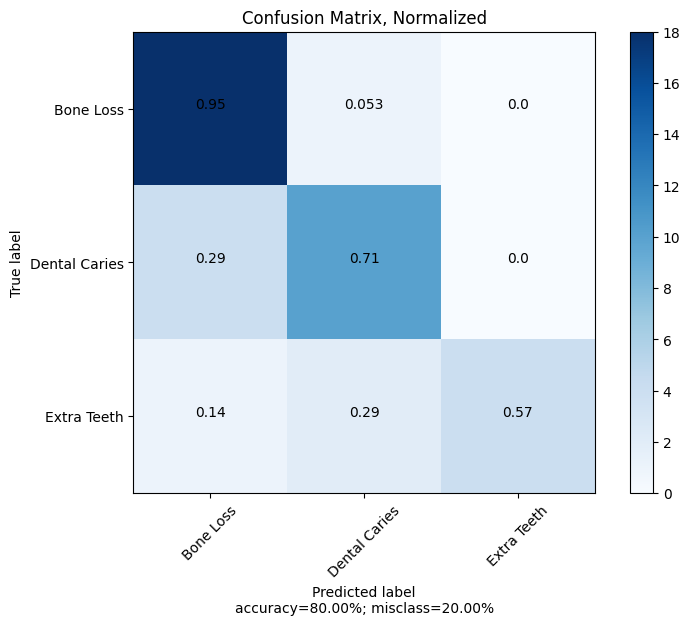

In [32]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##MobileNet v2

In [33]:
#MobileNet model
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
conv_base = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


9406464/9406464 [==============================] - 0s 0us/step


In [34]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 10s 107ms/step - loss: 1.0745 - accuracy: 0.5250 - val_loss: 0.7803 - val_accuracy: 0.6339
Epoch 2/20
50/50 [==============================] - 5s 93ms/step - loss: 0.8046 - accuracy: 0.6313 - val_loss: 0.7441 - val_accuracy: 0.6808
Epoch 3/20
50/50 [==============================] - 5s 95ms/step - loss: 0.7293 - accuracy: 0.6756 - val_loss: 0.6897 - val_accuracy: 0.6942
Epoch 4/20
50/50 [==============================] - 5s 91ms/step - loss: 0.6858 - accuracy: 0.7063 - val_loss: 0.6517 - val_accuracy: 0.7254
Epoch 5/20
50/50 [==============================] - 5s 98ms/step - loss: 0.6647 - accuracy: 0.7050 - val_loss: 0.6141 - val_accuracy: 0.7522
Epoch 6/20
50/50 [==============================] - 5s 92ms/step - loss: 0.6512 - accuracy: 0.7056 - val_loss: 0.8888 - val_accuracy: 0.6116
Epoch 7/20
50/50 [==============================] - 5s 92ms/step - loss: 0.6608 - accuracy: 0.7169 - val_loss: 0.6057 - val_accuracy: 0.7545
Epoch 8/20


In [35]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 79ms/step - loss: 0.5664 - accuracy: 0.8047


first image to predict
actual label: Bone Loss
1/1 [==============================] - 1s 877ms/step
predicted label: Dental Caries


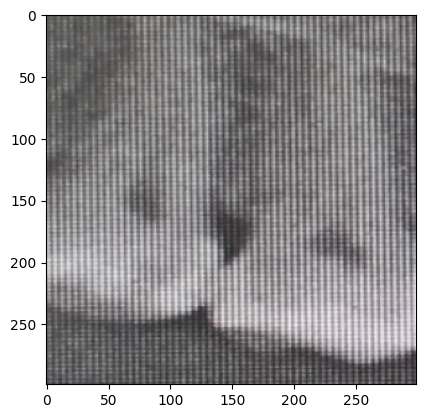

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


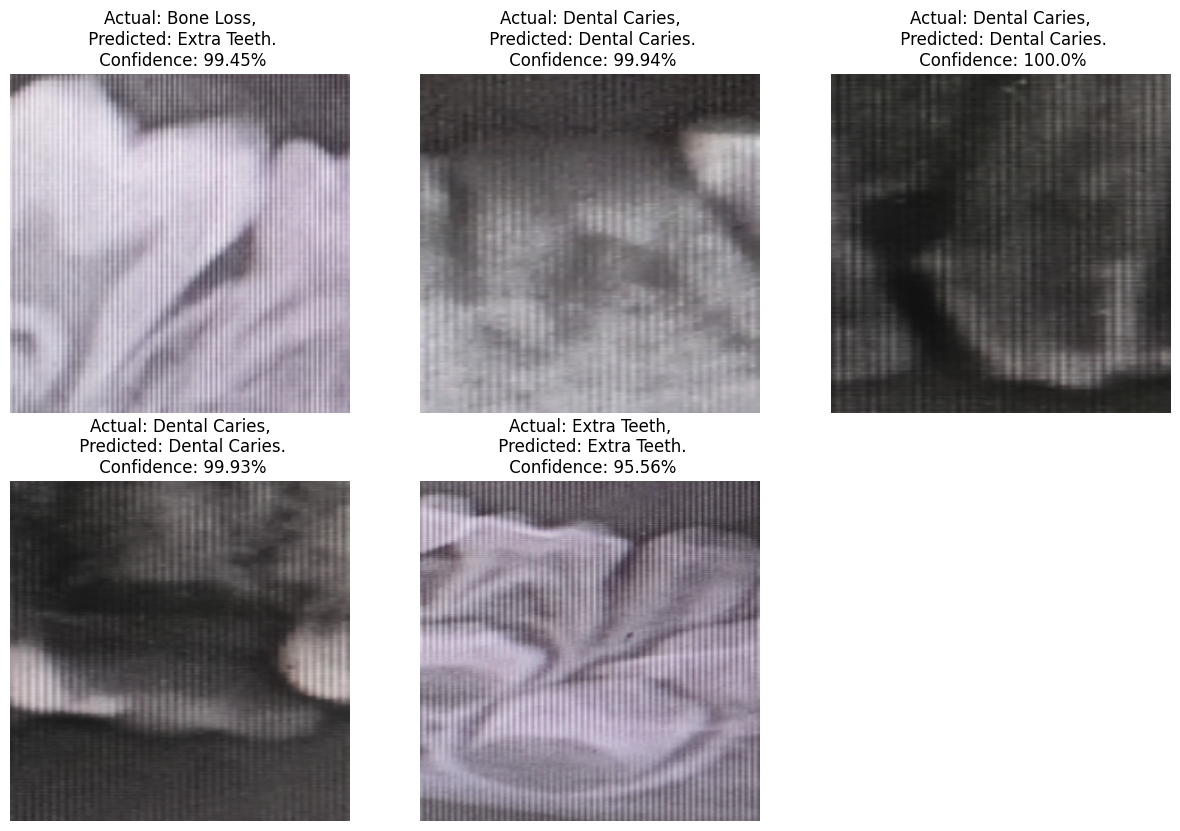

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

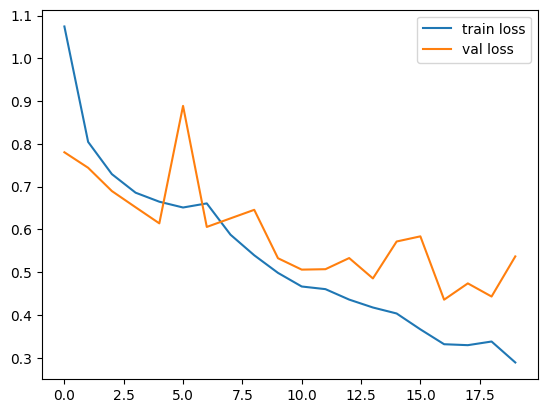

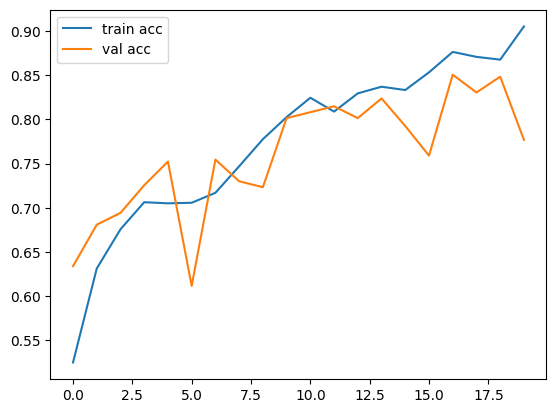

<Figure size 640x480 with 0 Axes>

In [39]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 22ms/step
Extra Teeth Bone Loss
1/1 [==============================] - 0s 24ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 21ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 25ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 21ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 21ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 24ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 22ms/step
Dental Caries Bone Loss
1/1 [==============================] - 0s 23ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 22ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 21ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 21ms/step
Extra Teeth Extra Teeth
1/

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [1.         0.77777778 0.63636364]
recall: [0.57894737 1.         1.        ]
fscore: [0.73333333 0.875      0.77777778]


In [42]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[11,  4,  4],
       [ 0, 14,  0],
       [ 0,  0,  7]])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


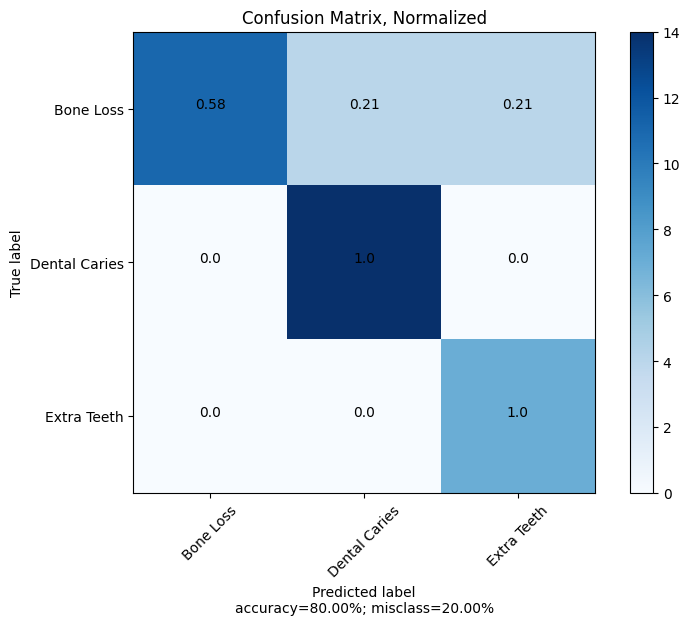

In [44]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##custom model only 3 layer cnn


In [45]:
conv_base = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(299, 299, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten()
])

x = conv_base.output
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [46]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
50/50 [==============================] - 5s 29ms/step - loss: 3.0338 - accuracy: 0.4338 - val_loss: 0.9451 - val_accuracy: 0.5580
Epoch 2/20
50/50 [==============================] - 1s 26ms/step - loss: 0.9244 - accuracy: 0.5537 - val_loss: 0.8724 - val_accuracy: 0.6719
Epoch 3/20
50/50 [==============================] - 1s 27ms/step - loss: 0.7951 - accuracy: 0.6456 - val_loss: 0.7445 - val_accuracy: 0.6920
Epoch 4/20
50/50 [==============================] - 1s 26ms/step - loss: 0.7478 - accuracy: 0.6787 - val_loss: 0.9498 - val_accuracy: 0.5603
Epoch 5/20
50/50 [==============================] - 1s 27ms/step - loss: 0.7130 - accuracy: 0.6888 - val_loss: 0.7125 - val_accuracy: 0.7411
Epoch 6/20
50/50 [==============================] - 1s 29ms/step - loss: 0.6416 - accuracy: 0.7306 - val_loss: 0.6939 - val_accuracy: 0.7188
Epoch 7/20
50/50 [==============================] - 2s 34ms/step - loss: 0.6255 - accuracy: 0.7462 - val_loss: 0.6397 - val_accuracy: 0.7723
Epoch 8/20
50

In [47]:
#Testing the model
scores = model.evaluate(test_ds)

8/8 [==============================] - 0s 16ms/step - loss: 0.4264 - accuracy: 0.8359


first image to predict
actual label: Bone Loss
1/1 [==============================] - 0s 105ms/step
predicted label: Bone Loss


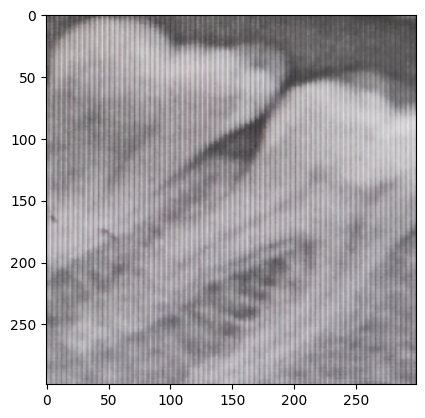

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


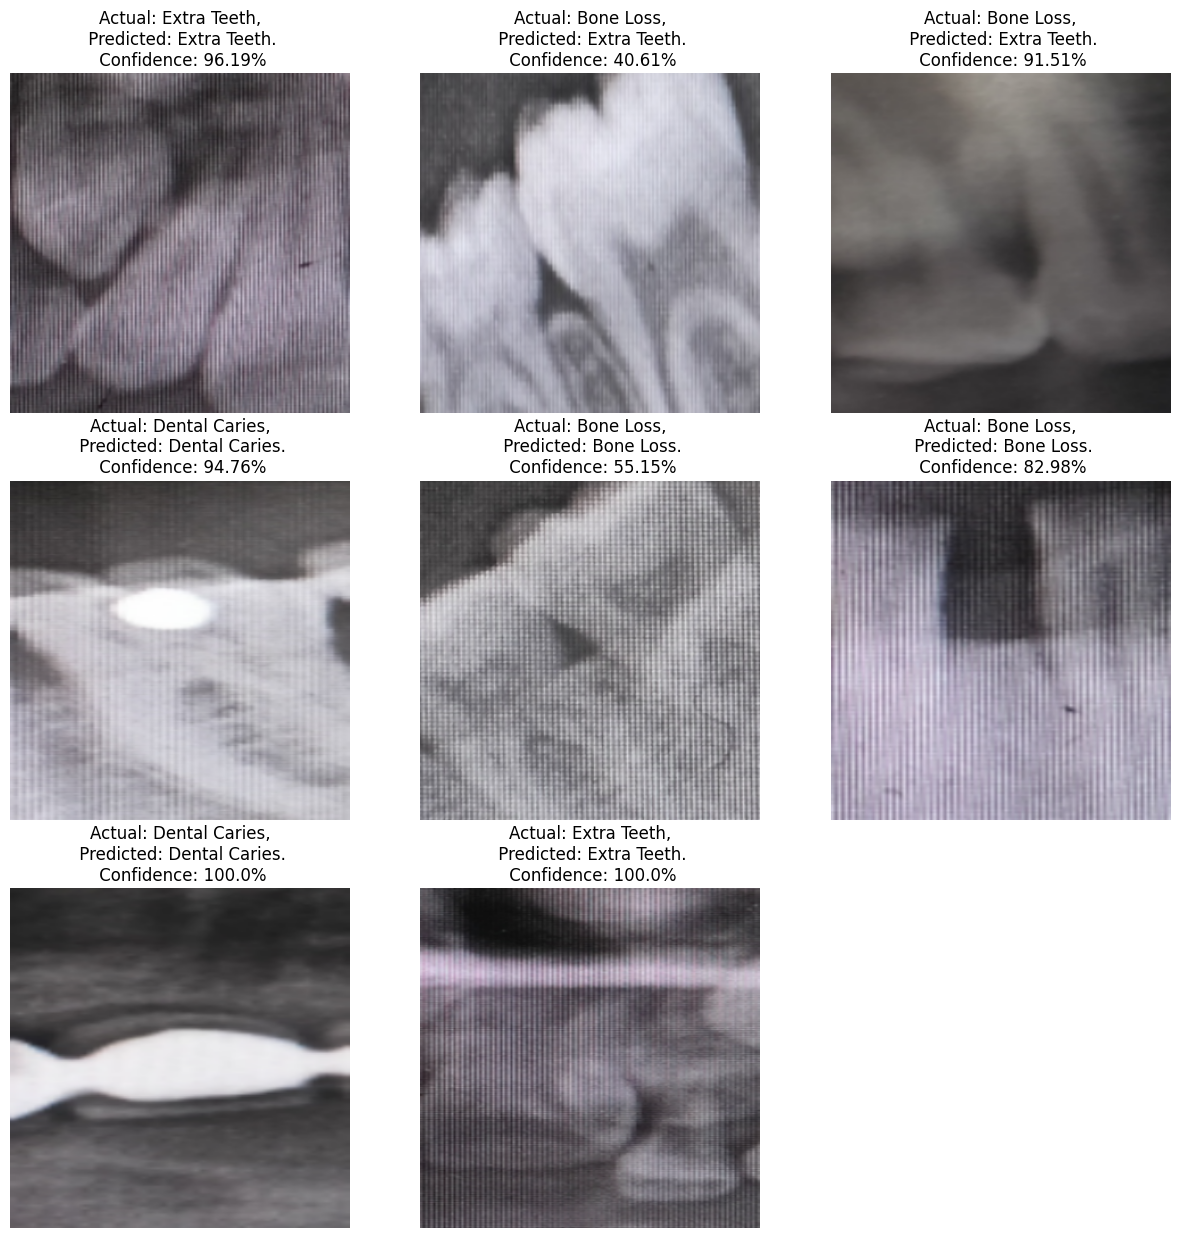

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

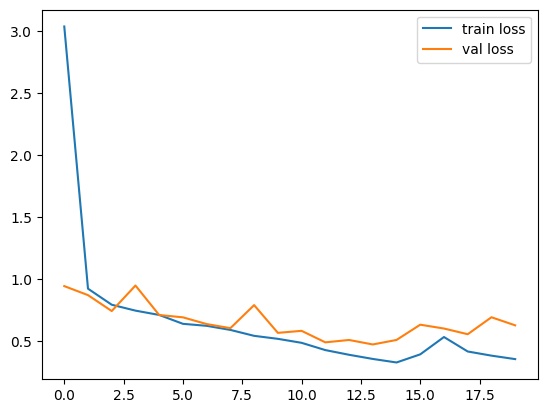

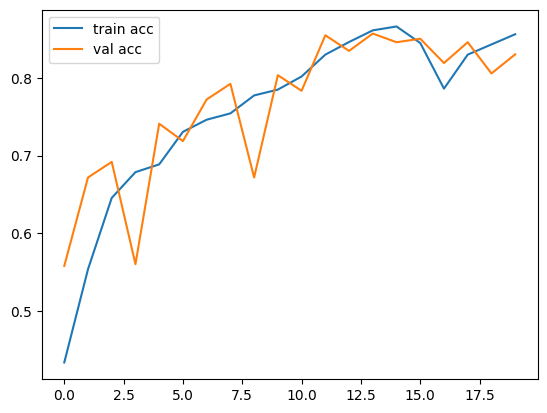

<Figure size 640x480 with 0 Axes>

In [51]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [52]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(8):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 29ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 26ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 34ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 27ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 27ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 26ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 37ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 31ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 28ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 24ms/step
Dental Caries Bone Loss
1/1 [==============================] - 0s 27ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 25ms/step
Bone Loss Bone Loss
1/1 [==============================] - 0s 28ms/step
Bone Loss Bone Loss
1/1 [==============================]

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.96153846 0.875      0.64285714]
recall: [0.83333333 0.91304348 0.81818182]
fscore: [0.89285714 0.89361702 0.72      ]


In [54]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[25,  1,  4],
       [ 1, 21,  1],
       [ 0,  2,  9]])

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


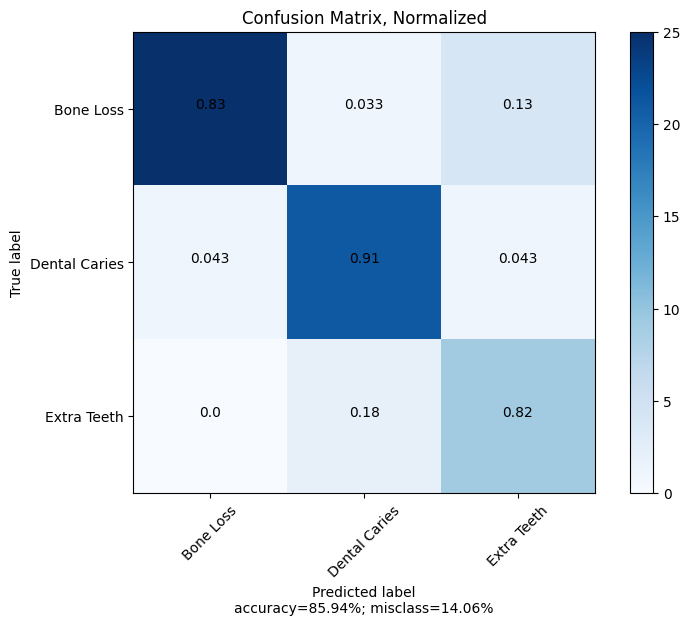

In [56]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")